# Drift Demands (Hayward)

This example uses the `quakeio` package to parse a collection of ground motion records
and calculate drift demands.

![](ll58658_2.svg)

In [1]:
import quakeio
import quakeio.processing as spec

In [2]:
# file_name = "../dat/58658_007_20210426_10.09.54.P.zip"
file_name = "../dat/nc73654060_ce58658p.zip"

In [3]:
collection = quakeio.read(file_name, "csmip.zip")
# collection.motions.keys()

In [4]:
top = collection.at(key="bent_4_north_column_top")
bot = collection.at(key="bent_4_north_column_grnd_level")

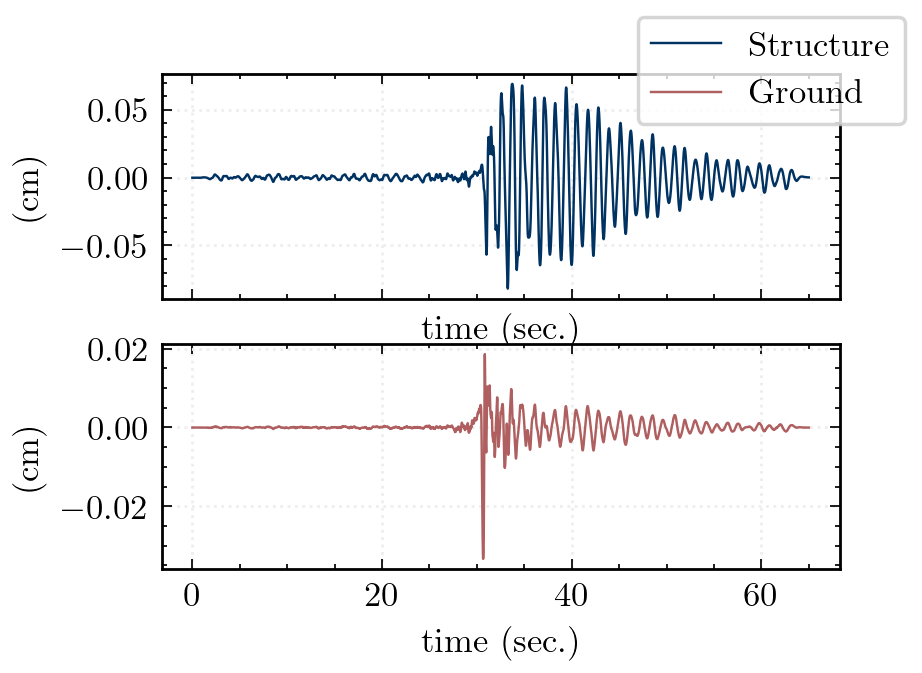

In [5]:
spec.plot_grid(series=[top.tran.displ, bot.tran.displ], 
               label =["Structure",          "Ground"])

In [6]:
inches_to_cm = 2.54
height = 47.0*12.0 * inches_to_cm

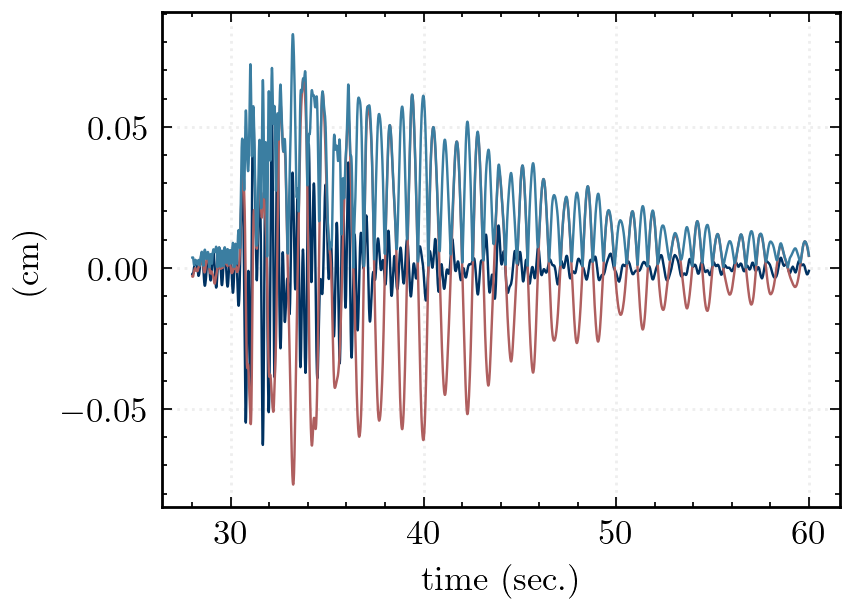

In [7]:
relative_resp = (top - bot).slice(28.,60.)
# relative_resp is a QuakeMotion with long,tran,vert series
ax = relative_resp.long.displ.plot()
ax = relative_resp.tran.displ.plot(ax=ax)
ax = relative_resp.resultant().displ.plot(ax=ax)

In [8]:
resultant_drift  = relative_resp.resultant().displ["peak_value"]/height
transverse_drift = relative_resp.tran.displ["peak_value"]/height

In [9]:
# for component in collection.components:
#     spec.Spectrum(component, damping=[0.001, 0.01]).plot()

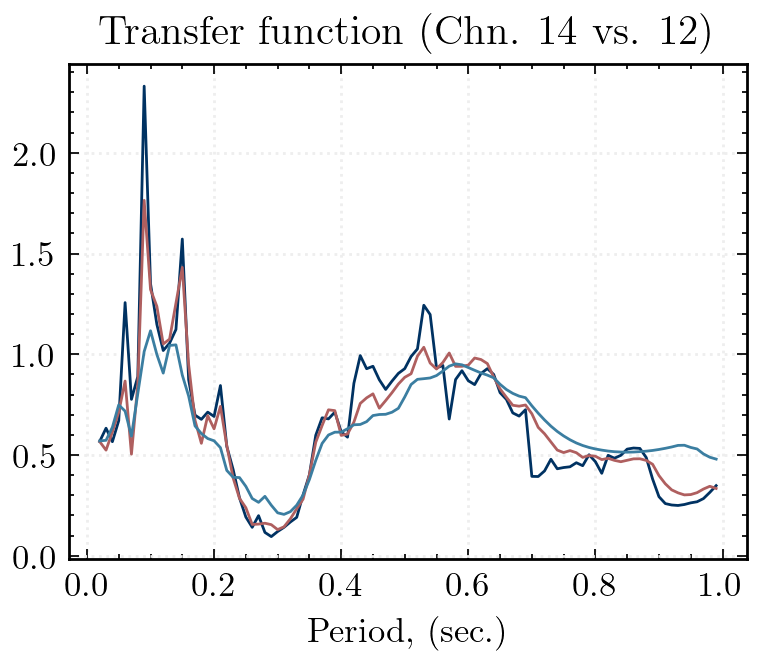

In [9]:
spec.TransferFunction((top.long,bot.long), damping=[0.001,0.01,0.05]).plot();

<AxesSubplot:title={'center':'Response spectrum (Chn. 12)'}, xlabel='Period, (sec.)'>

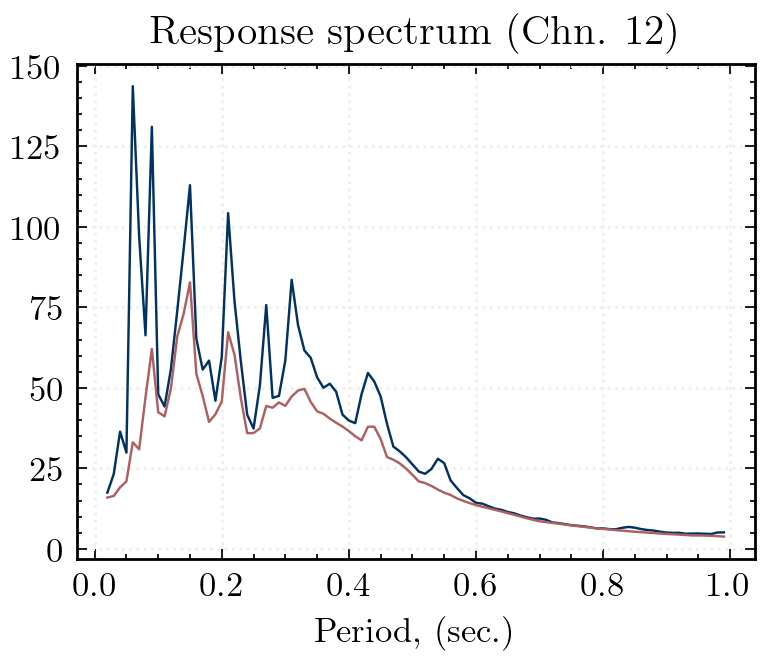

In [10]:
spec.Spectrum(bot.long, damping=[0.0, 0.01]).plot()

In [23]:
collection.motions["abutment_1"].components["long"].displ


QuakeSeries(0x7f84dcfdb400,cm)